# Customer Churn Analysis


# Problem Statement:


Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

# Importing the Libraries

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Importing the dataset


In [2]:
# Reading the csv file from dataset
df = pd.read_csv("Customer Churn Analysis")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In the above cell we can see the first 5 and last 5 rows of our dataset. We see that in our dataset there are a total of 7043 rows and 21 columns present. We see a mixture of numerical data columns and text data columns that will need to be converted to numerical format before training our model. Also the problem statement says that we are suppose to predict the customer churn so it makes this to be a Classification problem!

In [3]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6256,3751-KTZEL,Female,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,35.05,35.05,Yes
2105,0925-VYDLG,Female,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,75.25,242,Yes
3326,7657-DYEPJ,Male,1,No,No,38,Yes,No,DSL,No,...,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),70.15,2497.35,Yes
117,5299-RULOA,Female,0,Yes,Yes,10,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.25,1064.65,Yes
4989,0909-SDHNU,Female,0,No,Yes,7,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.80,201.95,No
5314,2535-PBCGC,Female,0,Yes,No,70,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),64.55,4504.9,No
6312,7055-VKGDA,Male,0,No,No,54,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),105.40,5643.4,Yes
5284,3317-HRTNN,Female,1,No,No,5,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,45.70,198,Yes
5665,6345-HOVES,Male,0,No,No,34,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),25.05,852.7,No
785,0691-IFBQW,Female,1,No,No,46,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,110.00,4874.8,Yes


# Exploratory Data Analysis (EDA)


In [4]:
df.shape

(7043, 21)

- There are 7043 cutomers and 21 features in the dataset.



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Using the info method we can see that there is 1 column with float data type, 2 columns with integer data type and 17 columns that have object data type. We will try to spearate these columns into numeric and object datatypes for easier analysis.

Data Description:

- Data is having 7043 entries, 0 to 7042
- Data having 21 columns and 7043 Rows
- All the columns are having 7043 Non-Null value, means data is not having any null values.
- Out of 21 columns we have 1 float, 2 int64 and 18 Object type values.
- memory usage: 1.1+ MB
- Here we can see Totalcharges is object type, but the values are float. It might be possible we have space in isnsted of value we will check where data having space or not.


Attribute Information:

customerID : Unique Id of Customer , object

gender : Gender of the customer, object

SeniorCitizen : Where customer is a SeniorCitizen or not, int

Partner : Where customer having Partner or not object

Dependents : Where customer having Dependents

tenure : Number of months the customer has stayed with the company

PhoneService : Whether the customer has a phone service or not (Yes, No)

MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService : Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract : The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)

PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges : The amount charged to the customer monthly

TotalCharges : The total amount charged to the customer    

Taget Column: Churn : Whether the customer churned or not (Yes or No)


# Checking null values


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- Luclkiy we are not having any Null values



In [7]:
df.duplicated().sum()

0

- We also not having any duplicated value in the data.



# Checkign any space values filled in the columns


In [8]:
df.isin([" "]).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- Data is gaving 11 value which are filled with space character.


In [9]:
# getting list of object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n", object_datatype)

# getting the list of numeric data type column names
number_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n", number_datatype)

Object Data Type Columns are:
 ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']

Number Data Type Columns are:
 ['SeniorCitizen', 'tenure', 'MonthlyCharges']


- We have successfully bifurcated the object datatype column names and numeric data type column names. Since we do not have to worry about outliers and skewness in categorical columns we can use this separated column names to pre process data only on numerical continous columns.

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- Using the describe method to check the numerical data details. There are only 3 columns which have numerical values in them and it looks like the count, mean, standard deviation, minimum value, 25% quartile, 50% quartile, 75% quartile and maximum value are all properly distributed in terms of data points showing no abnormality as such.

In [11]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Here I am using the describe method along with it's parameter all to include all the columns present in our dataset irrespective of them being numeric or text data. I have also used to the transpose option to make sure that we are able to see the column information properly without having to scroll through multiple data.

In [12]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- The isna method along with the sum function gives us the details on the missing values.



In [13]:
print(f"Rows and Columns before dropping duplicates: ", df.shape)
df.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates: ", df.shape)

Rows and Columns before dropping duplicates:  (7043, 21)
Rows and Columns after dropping duplicates:  (7043, 21)


- With the drop_duplicates option I am getting rid of all the duplicate values present in our dataset.



In [14]:
df.nunique().to_frame("Unique Values")

,Unique Values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


- With the usage of nunique method we can see the total number of unique values present in all the columns



In [15]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*120)

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
gender
Male      3555
Female    3488
Name: gender, dtype: int64
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
DevicePro

- Checking the number of rows covered by all the unique values present in our object data type columns. It looks like all the columns have proper categories but the column "TotalCharges" has float value still gets tagged as object data type plus 11 rows of that column has blank data. We will need to fix this before we proceed with any further analysis.

In [16]:
df['TotalCharges'] = df['TotalCharges'].replace(' ' , '0.0')
df['TotalCharges'].value_counts()

0.0       11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

- Since we saw 11 rows with blank data present in the column "TotalCharges" we have replaced them with the value 0



In [17]:
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['TotalCharges'].dtype

dtype('float64')

- Also column "TotalCharges" even though had all float numbers for some reason it showed as object data type and therefore we are converting it into the float data type now

In [18]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('O')
df['SeniorCitizen'].dtype

dtype('O')

- Similarly I am converting the column "SeniorCitizen" from numeric data type to object datatype as it contains categorical information and it will be easier to process it like a category with the other. Having said that we will convert it back using encoding technique later on before we initiate our model building process

In [19]:
# getting list of object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n", object_datatype)

# getting the list of numeric data type column names
number_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n", number_datatype)

Object Data Type Columns are:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Number Data Type Columns are:
 ['tenure', 'MonthlyCharges', 'TotalCharges']


- Now we have sucessfully made sure that object data type covers all the categorical column data while the numeric data type has the continous column information stored in it

In [20]:
df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


- Here we can see a strong correlation of tenure, monthlycharges with TotalCharges.



# Data analysis and Visualization


# Univariate Analysis


Here We will analyse the distribution of our data columns.

before analysing lets divide dataset in categorical and numerical columns.

In [21]:
cat_feature= df.select_dtypes(include=[np.object])

Lets first analyse the churn percentage, we will analyse this using pi chart.



Text(0.5, 1.0, 'Percentage of Customer Churn ')

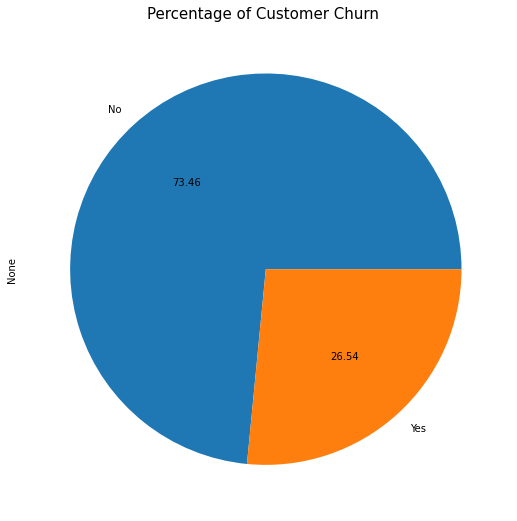

In [22]:
plt.figure(figsize=(15,9))
cat_feature.groupby('Churn').size().plot(kind='pie', autopct='%.2f')
plt.title("Percentage of Customer Churn ", fontsize =15)

- Here we can see 26.58 percentage of Customer are not satisfied with the company and dont wanted to contineu with company.



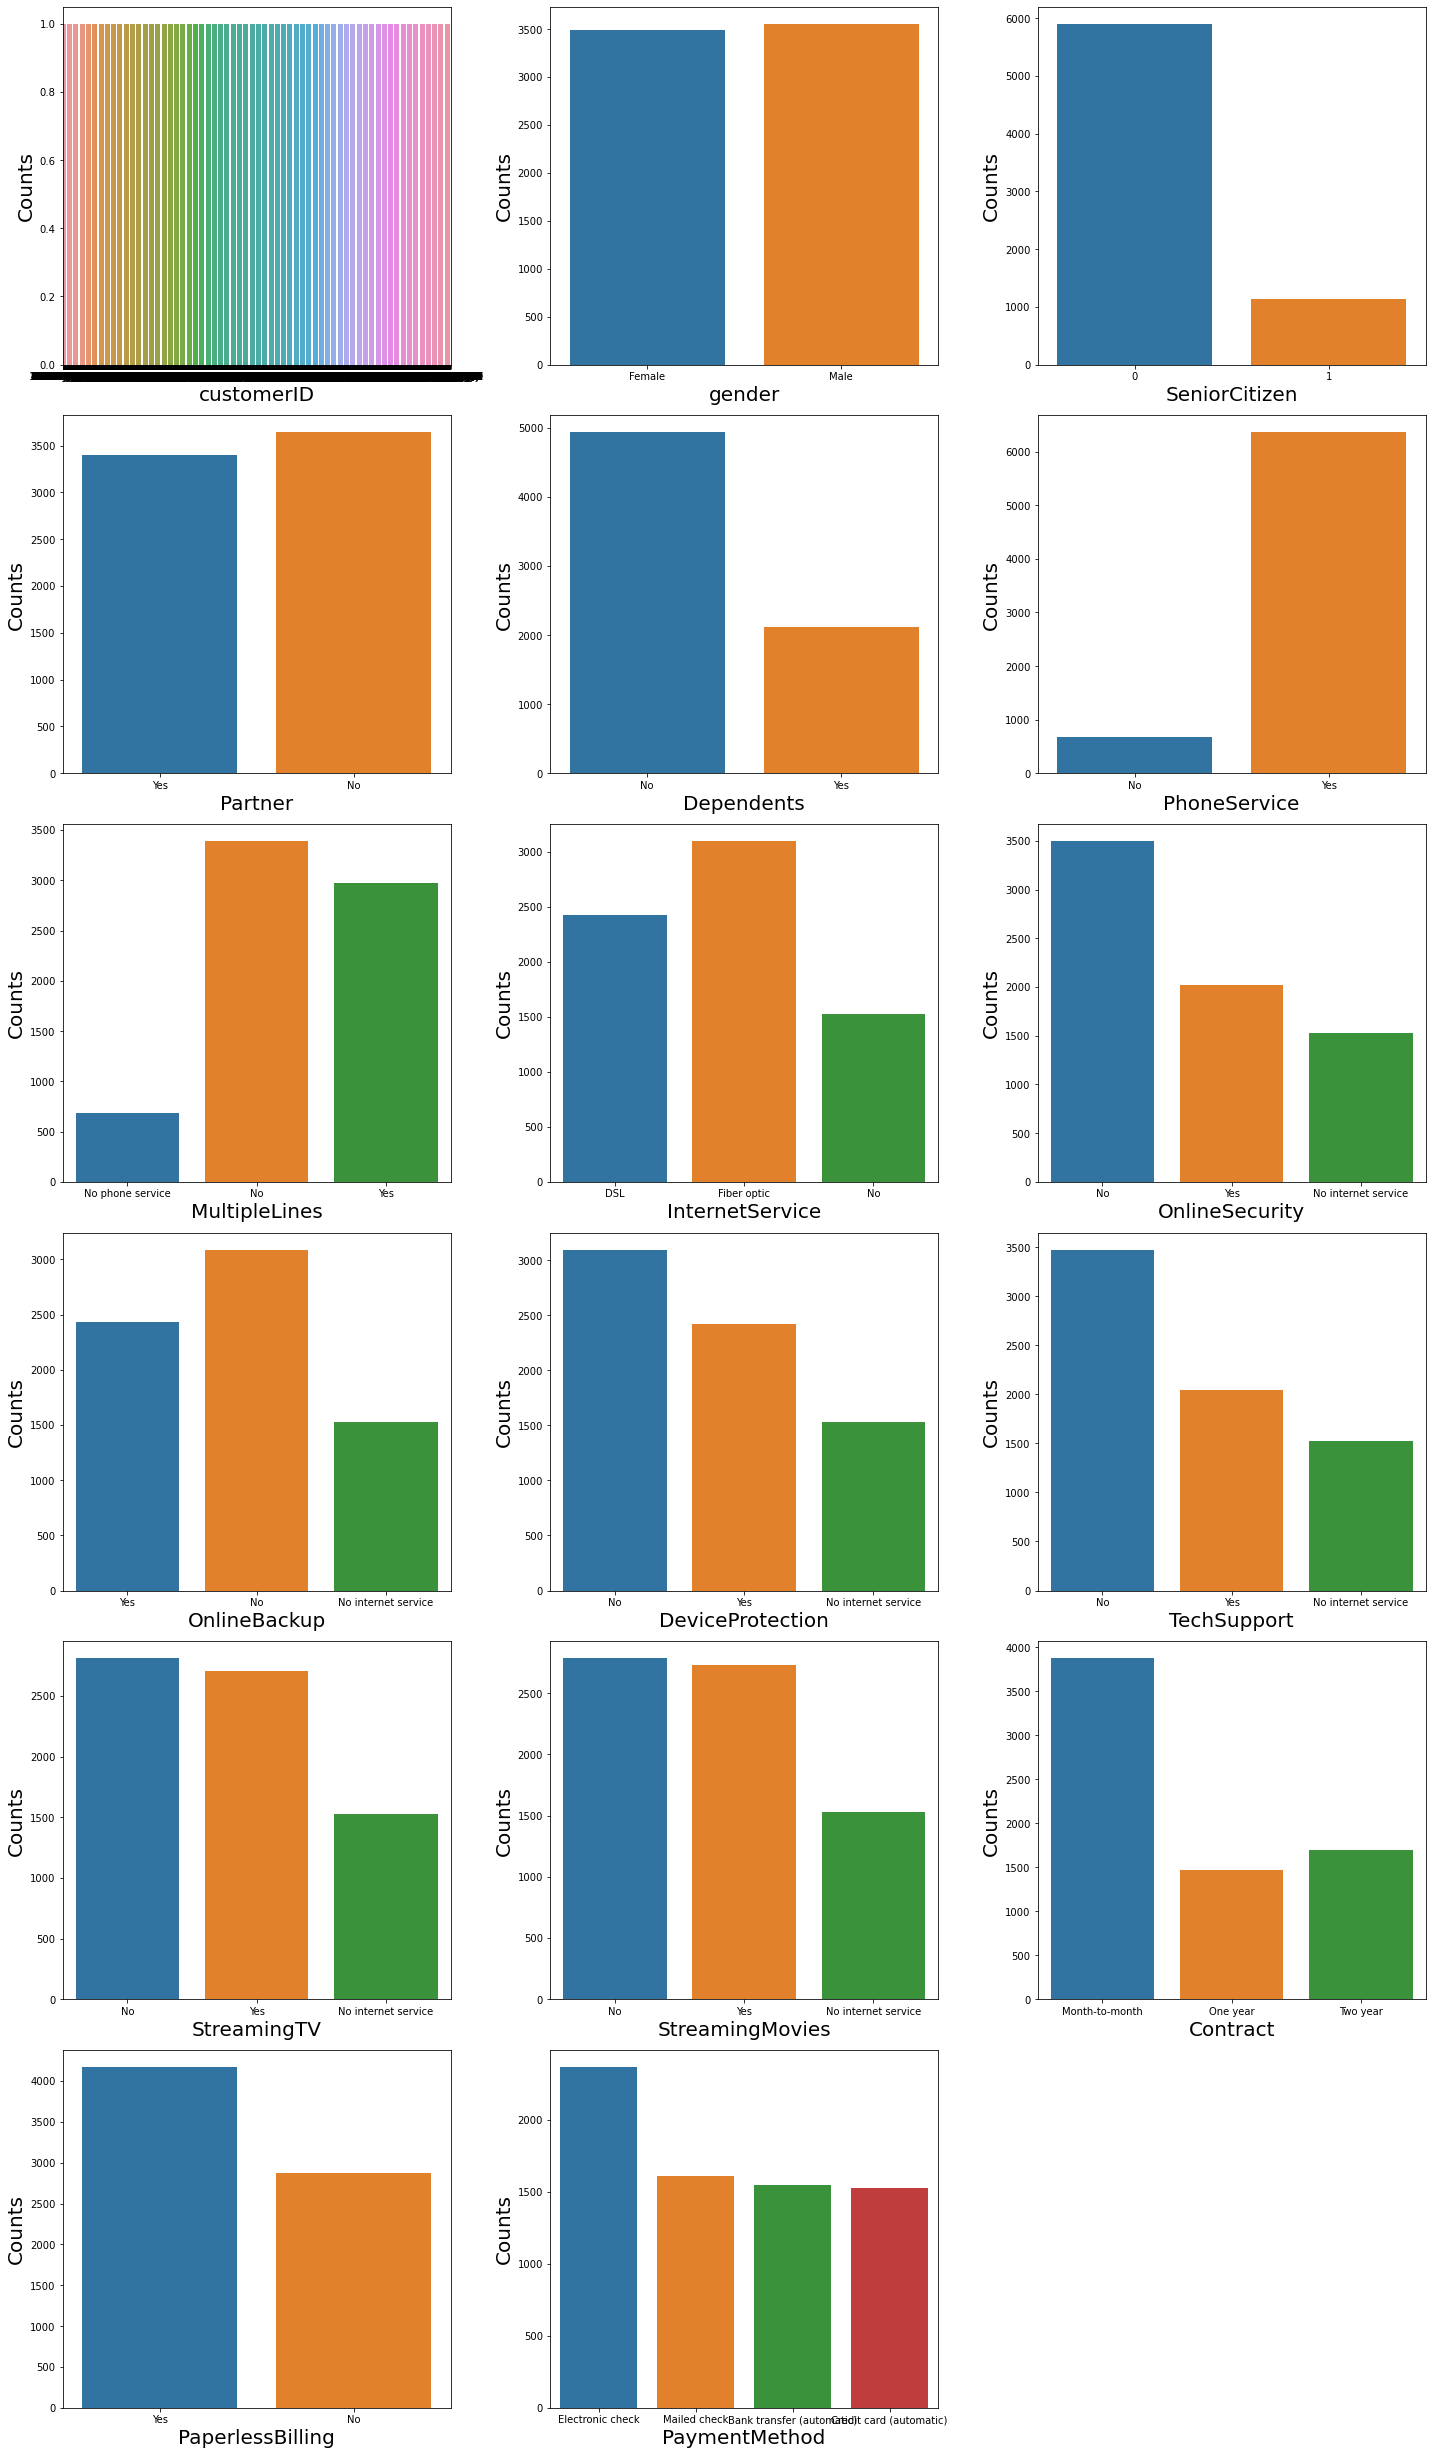

In [23]:
plt.figure(figsize=(20,45))
plotnumber= 1

for column in cat_feature:
    if plotnumber<=17:
        ax= plt.subplot(8,3, plotnumber)
        sns.countplot(cat_feature[column])
        
        plt.xlabel(column, fontsize= 20)
        plt.ylabel('Counts', fontsize= 20)
    plotnumber+=1
plt.tight_layout()

Gender : No of males and females are almost equal

Partner: Count for having partner is less as compare to without partner

Dependents : Near about 70 percent customers are not having any Dependent

PhoneService : More than 90 percent customers have PhoneService

MultipleLines : More than 48 percent customer not having multiple lines

InternetService : For More than 44 percent customers internet service provider is Fiber Optics

OnlineSecurity: 49 percent customers are not having Online Security

OnlineBackup: More than 43 customers Not having online backup

DeviceProtection : More than 43 customers are not having Device Protection

TechSupport: 49 percent customers are not having any technical support

StreamingTV : The count for Streaming TV and Not Streaming TV are almost same

StreamingMovies : The count for Streaming Movies and Not Streaming Movies are almost same

Contract : More than 55 percent of the cutmores are having month-to-month contract

PaperlessBilling : we can see more than 59 percent of the customers are using PaperlessBilling

PaperlessBilling : Most of the customers are using Electronic check

Churn : 26 percent customer out 100 are churned.

In [24]:
num_feature= df.select_dtypes(include=[np.number])

Text(0.5, 1.0, 'tenure')

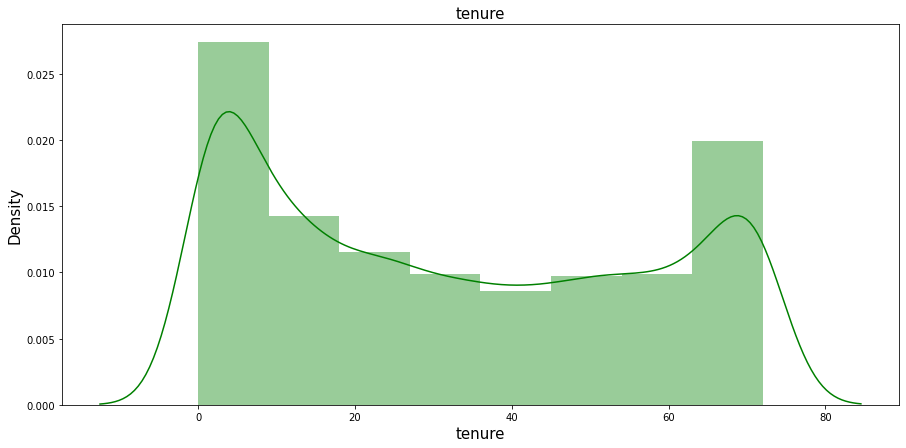

In [25]:
plt.figure(figsize=(15,7))
sns.distplot(num_feature['tenure'], bins= 8, color='g')
plt.xlabel('tenure', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('tenure', fontsize=15)

- Here we can see the probablity to have tenure 0-10 and more than 60 is more.



Text(0.5, 1.0, 'MonthlyCharges')

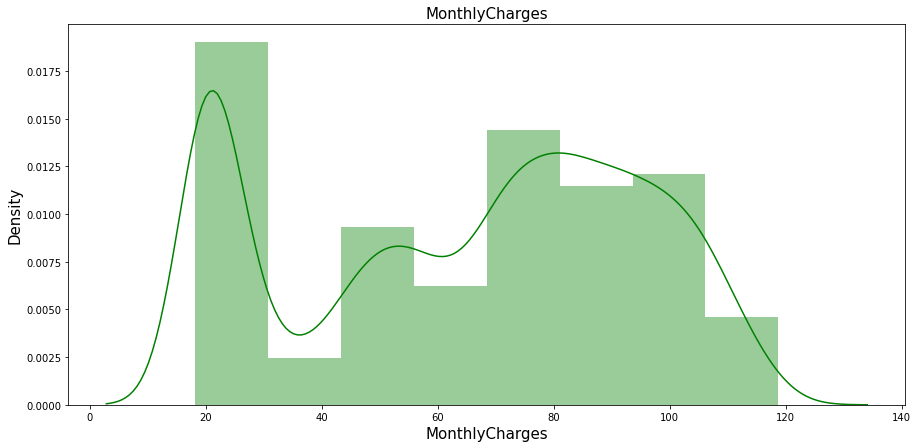

In [26]:
plt.figure(figsize=(15,7))
sns.distplot(num_feature['MonthlyCharges'], bins= 8, color='g')
plt.xlabel('MonthlyCharges', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('MonthlyCharges', fontsize=15)

- Chance of customers having monthly cahrge in the range of 70 to 100, is more as compare to other charges.



Text(0.5, 1.0, 'TotalCharges')

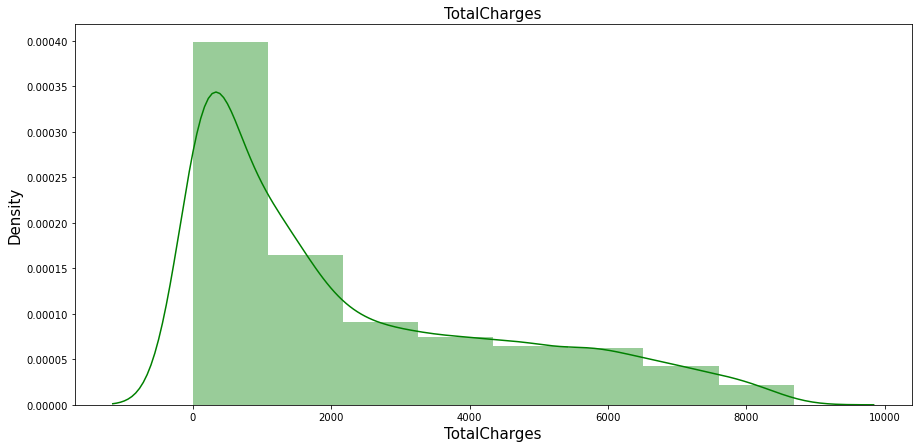

In [27]:
plt.figure(figsize=(15,7))
sns.distplot(num_feature['TotalCharges'], bins= 8, color='g')
plt.xlabel('TotalCharges', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('TotalCharges', fontsize=15)

- Here we can see skewness present in the Total charge column, customers in the range 0 to 2000 are more.



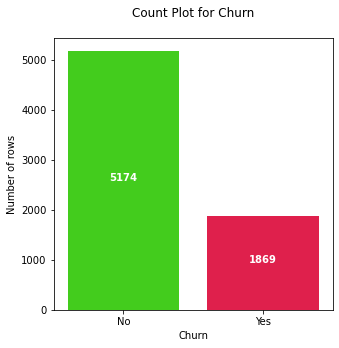

In [28]:
plt.style.use('seaborn-pastel')

try:
    plt.figure(figsize=(5,5))
    col_name = 'Churn'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

* In the above count plot we can see that "No Churn" values are way higher than "Yes Churn" data. Since this is our target label it indicates an imbalanced data which will need to be rectified later on.

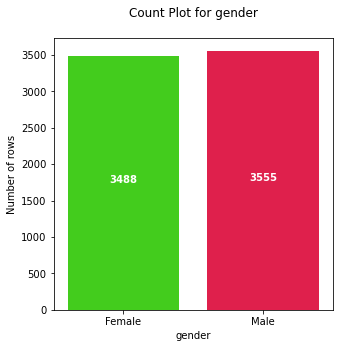

In [29]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'gender'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

- In the above count plot we can see that the total number of male and female gender is almost same still males being at a higher end than female covering the data points in our gender column.



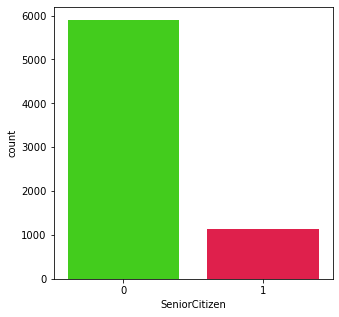

In [30]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'SeniorCitizen'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

- In the above count plot we can see that the senior citizen value shows 0 to be not resent and 1 as being a senior citizen. So as we see less number of 1 present in our column it indicates that the number of non senior citizens is quite high than the senior citizens data.

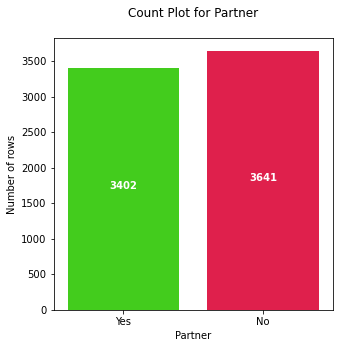

In [31]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'Partner'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

- In the above count plot we can see that the partner details are almost similar indicating that people with no partner are a bit higher than people who have partners.



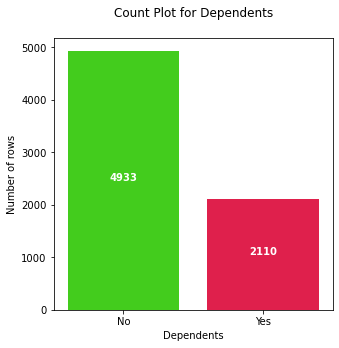

In [32]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'Dependents'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

- In the above count plot we can see that people with dependents are way less that people who do not have anyone dependent on them.



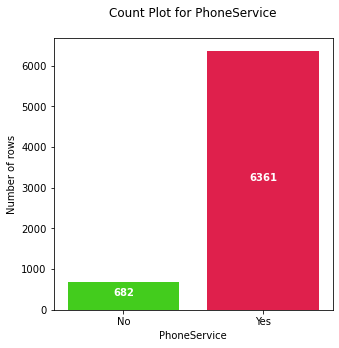

In [33]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'PhoneService'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

- In the above count plot we can see that people with a phone service cover a large data chunk while there are only few people who do not own a phone service.



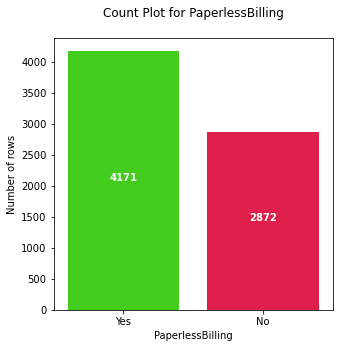

In [34]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'PaperlessBilling'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

- In the above count plot we can see that people who prefer paper less billing are high in number however we still have a huge number of people who prefer the traditional way of receiving a paper bill.



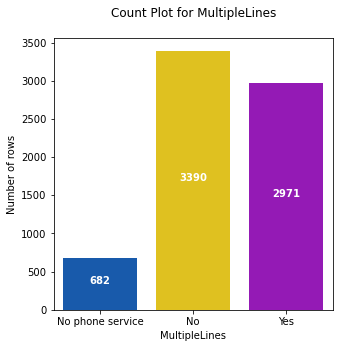

In [35]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'MultipleLines'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

- In the above count plot we can see that people with single line are higher in number than people who have multiple lines but we also see a minority of people who do not own a phone service yet.

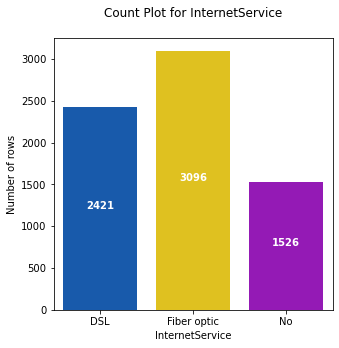

In [36]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'InternetService'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

- In the above count plot we can see that majority of people have chosen to get a high speed fibre optic internet but there are many people who do not own an internet service at all

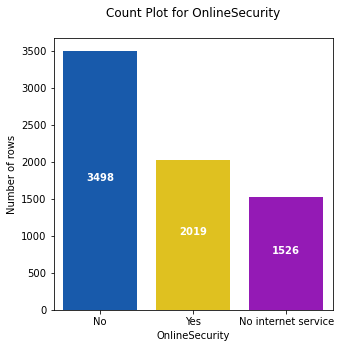

In [37]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'OnlineSecurity'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

- In the above count plot we can see that people who do not have any internet service obviously do not need any online security either but there is a huge number in people who own an internet service but do not use any online security yet.

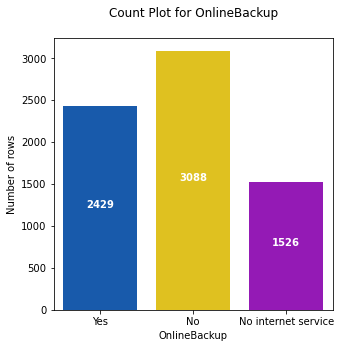

In [38]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'OnlineBackup'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

- In the above count plot we can see that just like people with no internet service and online security the same chunk of folks have no online backup usage either. But the difference between people who use internet and do not have online backup vs people who use online back up is relatively lesser as compared to online security details.

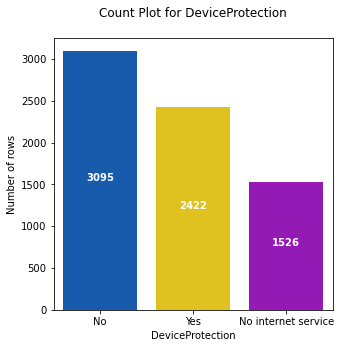

In [39]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'DeviceProtection'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

- In the above count plot we can see that people without any device protection is higher in number as compared to people who have some kind of device protection.



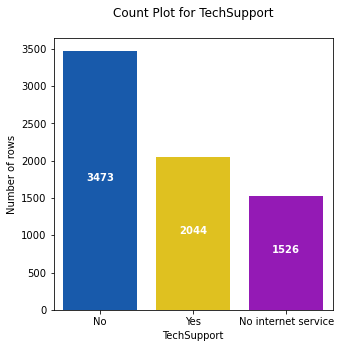

In [40]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'TechSupport'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In the above count plot we can see that people who do not need technical support is higher in number as compared to people who need technical assistance.

- 

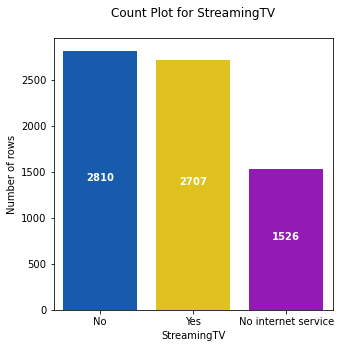

In [41]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'StreamingTV'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

- In the above count plot we can see that people who do not use streaming TV service is slightly higher than the people who do use streaming TV service.



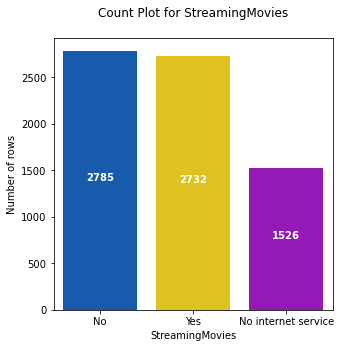

In [42]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'StreamingMovies'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

- In the above count plot we can see that just like streaming TV service there are people who do not stream movies a slight higher than people who do enjoy streaming movies online.

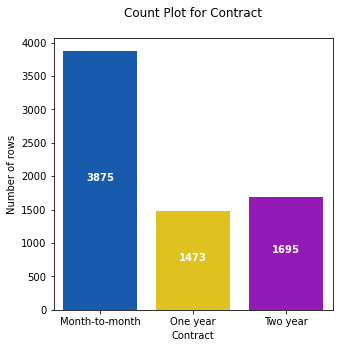

In [43]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'Contract'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

- In the above count plot we can see that there are a lot of people who prefer the month to month contract over the 1 year or 2 year contract term.



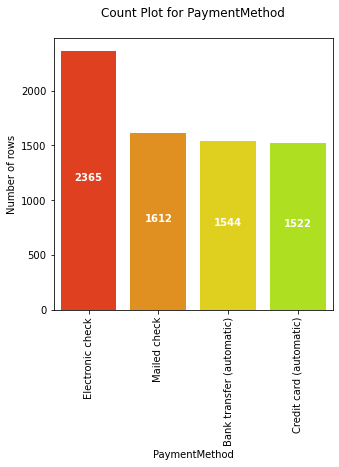

In [44]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'PaymentMethod'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.xticks(rotation=90)
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

- In the above count plot we can see that the preferred payment amount by people is the electronic check. While people using the mailed check, automatic bank transfer and automatic credit card debit option fall in a similar range of numbers

# Bivariate analysis


Here we analyse our feature columns with respect to churn which our target variable.



In [45]:
for col in cat_feature:
    print('\n%s column: '%col)
    print(cat_feature[col].value_counts(),'\n'),
    print('='*30)


customerID column: 
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64 


gender column: 
Male      3555
Female    3488
Name: gender, dtype: int64 


SeniorCitizen column: 
0    5901
1    1142
Name: SeniorCitizen, dtype: int64 


Partner column: 
No     3641
Yes    3402
Name: Partner, dtype: int64 


Dependents column: 
No     4933
Yes    2110
Name: Dependents, dtype: int64 


PhoneService column: 
Yes    6361
No      682
Name: PhoneService, dtype: int64 


MultipleLines column: 
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 


InternetService column: 
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 


OnlineSecurity column: 
No                     3498
Yes                    2019
No internet service    1526


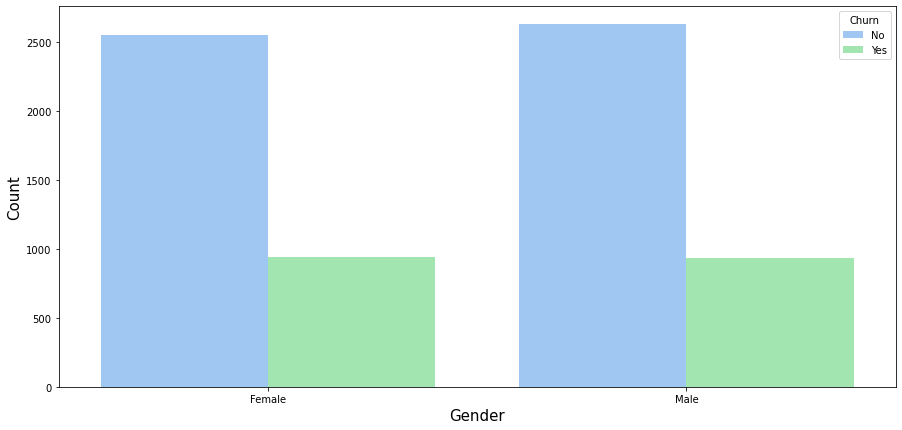

In [46]:
plt.figure(figsize=(15,7))
sns.countplot(df['gender'], hue='Churn', data= df)
plt.xlabel('Gender', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

- Male and female both are equalily having chance of churn.



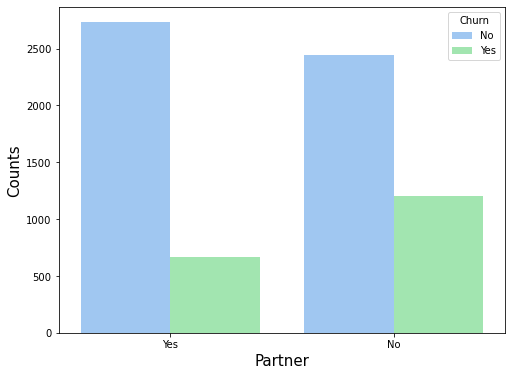

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Partner', data= cat_feature, hue='Churn')
plt.xlabel('Partner', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

- Here we can see the customers not having partners are more likely to churn.



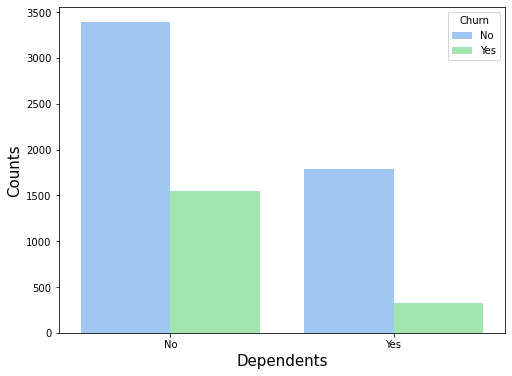

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', data= cat_feature, hue='Churn')
plt.xlabel('Dependents', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

- Churn for customers not having any dependent is more as compare to customers having dependent.



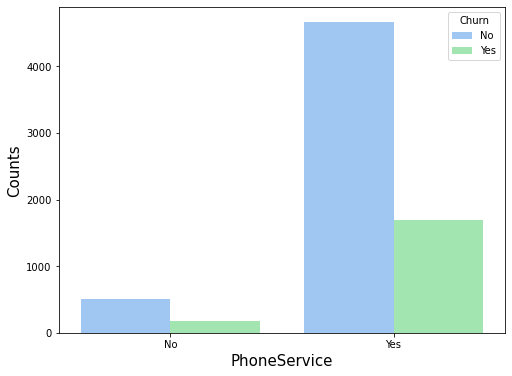

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PhoneService', data= cat_feature, hue='Churn')
plt.xlabel('PhoneService', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

- Customers having phone service are more likely to churn



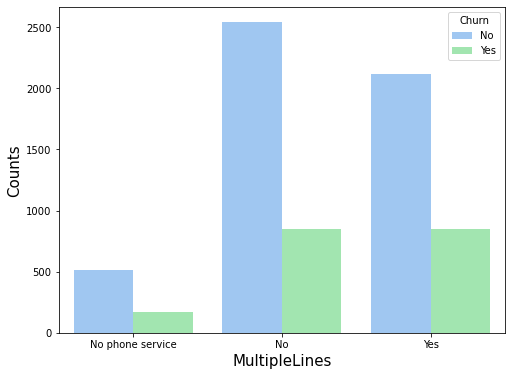

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(x='MultipleLines', data= cat_feature, hue='Churn')
plt.xlabel('MultipleLines', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

- Customers having multiple lines are more likely to churn.



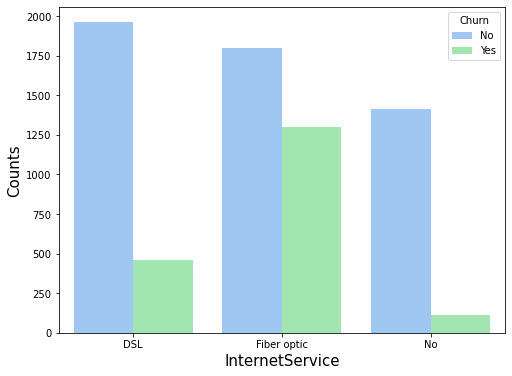

In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', data= cat_feature, hue='Churn')
plt.xlabel('InternetService', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

- Customers option for fiber optics internet service are more likely to churn.



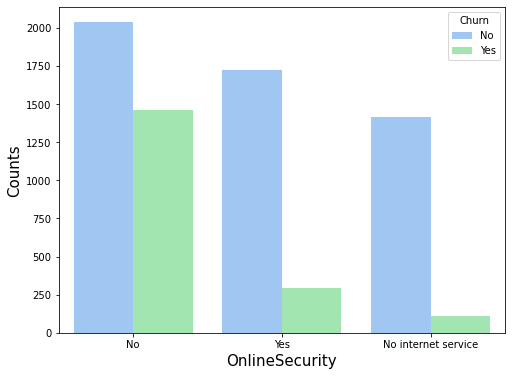

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OnlineSecurity', data= cat_feature, hue='Churn')
plt.xlabel('OnlineSecurity', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

- Customers not having Online security are more likely, to churn.



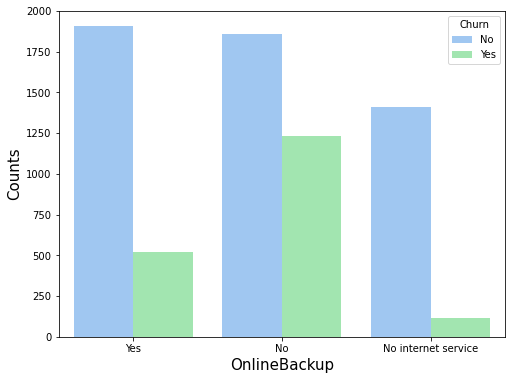

In [53]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OnlineBackup', data= cat_feature, hue='Churn')
plt.xlabel('OnlineBackup', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

- Customers not having online backup are more likely to churn.



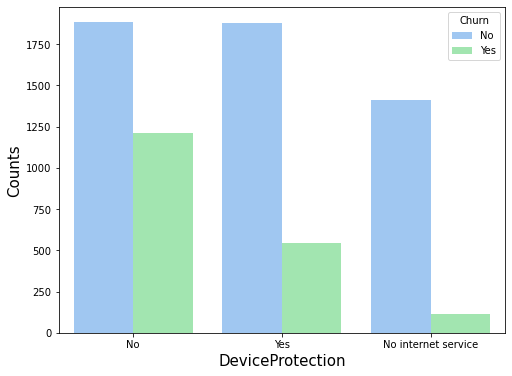

In [54]:
plt.figure(figsize=(8, 6))
sns.countplot(x='DeviceProtection', data= cat_feature, hue='Churn')
plt.xlabel('DeviceProtection', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

- Customers not having Device Protection are more likly to churn.



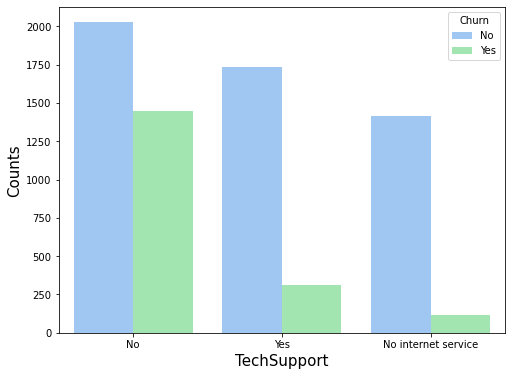

In [55]:
plt.figure(figsize=(8, 6))
sns.countplot(x='TechSupport', data= cat_feature, hue='Churn')
plt.xlabel('TechSupport', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

- Customers without any Technical support are more likely to churn



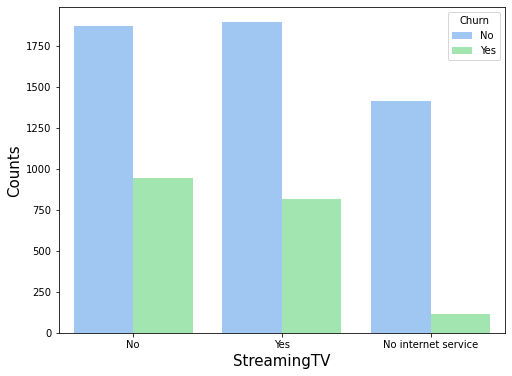

In [56]:
plt.figure(figsize=(8, 6))
sns.countplot(x='StreamingTV', data= cat_feature, hue='Churn')
plt.xlabel('StreamingTV', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

- Customers not having Streaming TV are more likely to churn.



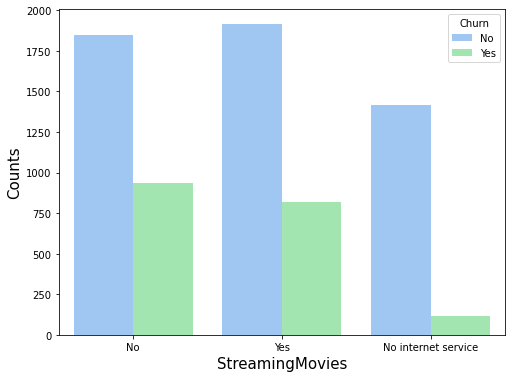

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(x='StreamingMovies', data= cat_feature, hue='Churn')
plt.xlabel('StreamingMovies', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

- Customers not having Streaming Movies are more likely to churn.

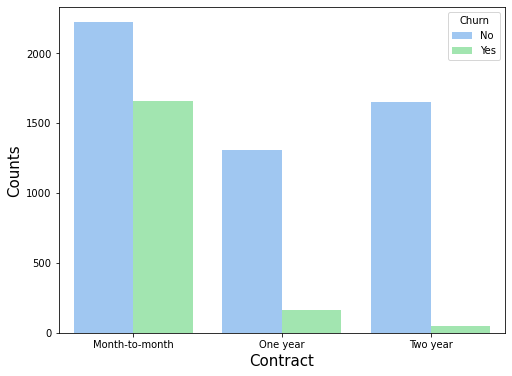

In [58]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', data= cat_feature, hue='Churn')
plt.xlabel('Contract', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

- Customers having Month to month Contract are more likely to churn.



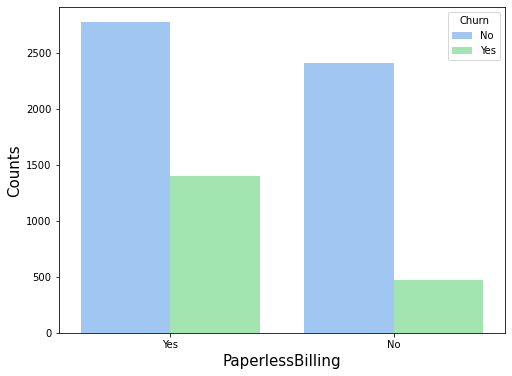

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaperlessBilling', data= cat_feature, hue='Churn')
plt.xlabel('PaperlessBilling', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

- Customers having Paperless Billing are more likely to churn.



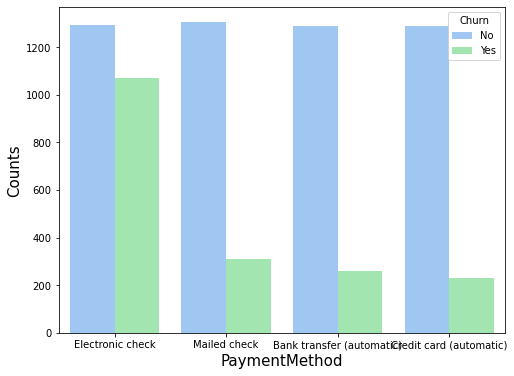

In [60]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentMethod', data= cat_feature, hue='Churn')
plt.xlabel('PaymentMethod', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

- Customers having Electronucs Payment method are more likely to churn.



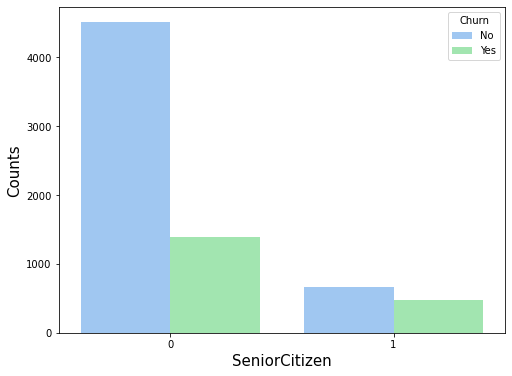

In [61]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', data= df, hue='Churn')
plt.xlabel('SeniorCitizen', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

- Customers who are not Senior Citizen are more likely to churn.



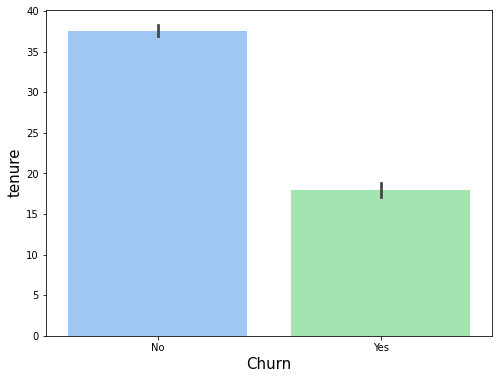

In [62]:
plt.figure(figsize=(8, 6))
sns.barplot(y='tenure', x='Churn', data= df)
plt.xlabel('Churn', fontsize=15)
plt.ylabel('tenure', fontsize=15)
plt.show()

- Bar Plot indiactes Higher the tenure Chance of churn is less.

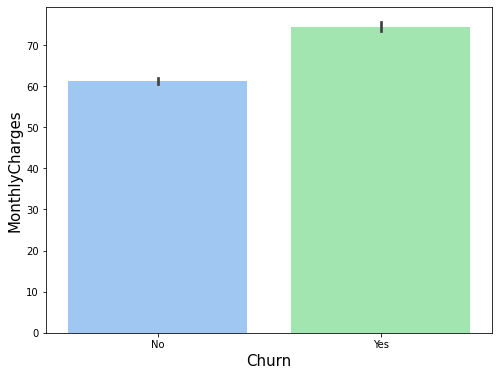

In [63]:
plt.figure(figsize=(8, 6))
sns.barplot(y='MonthlyCharges', x='Churn', data= df)
plt.xlabel('Churn', fontsize=15)
plt.ylabel('MonthlyCharges', fontsize=15)
plt.show()

- Higher the monthly charges Higher the chance to Churn.

# Multivariate Analysis


<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

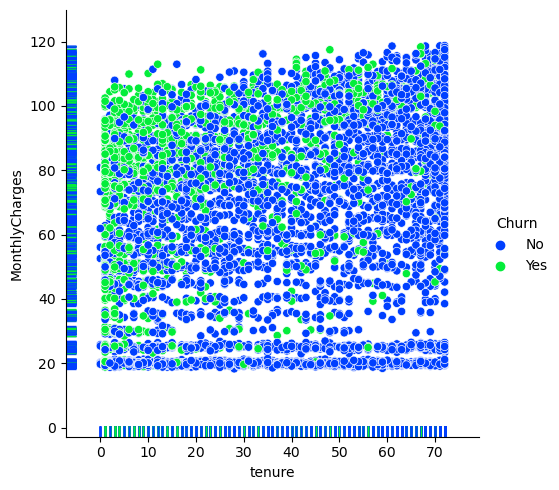

In [64]:
plt.style.use('default')
plt.style.use('seaborn-bright')

sns.relplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', legend=False)

- The above plot shows us that people in the initial months of service usage are more prone to discontinue if they are unhappy with the service offered to them and therefore strong retension on those phase are required.

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

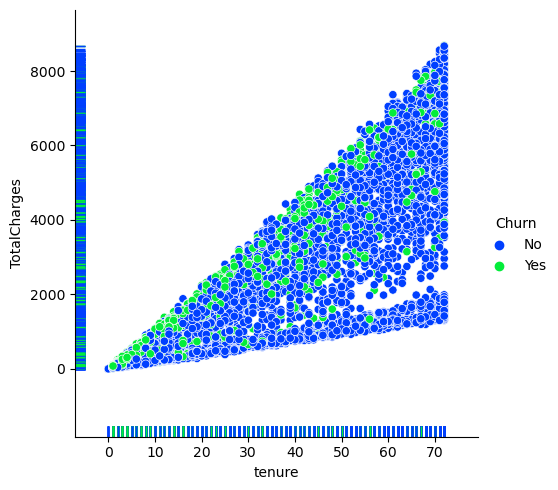

In [65]:
sns.relplot(data=df, x='tenure', y='TotalCharges', hue='Churn')
sns.rugplot(data=df, x='tenure', y='TotalCharges', hue='Churn', legend=False)

- The above plot shows us that as the tenure increases the total charge increase as well and if people have chosen to spend a high tenure using the service then the churn criteria is low or negligible.

<AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>

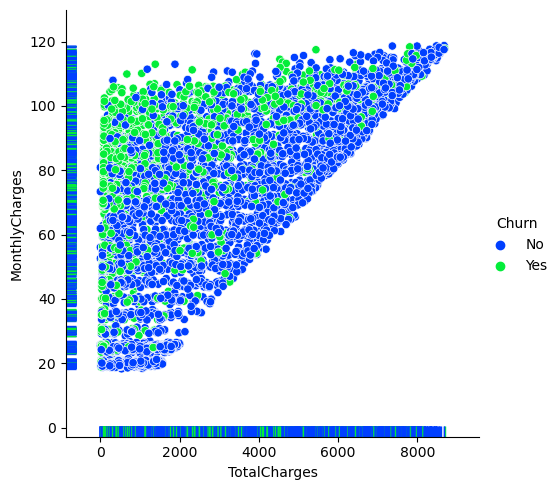

In [66]:
sns.relplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn', legend=False)

- The above plot shows us that people with high monthly charges tend to leave the service and are not able to contribute much to the total charges. Similarly if a customer has chosen to stick around with the reasonable monthly charges then there is a steep increase with the total charges as well.

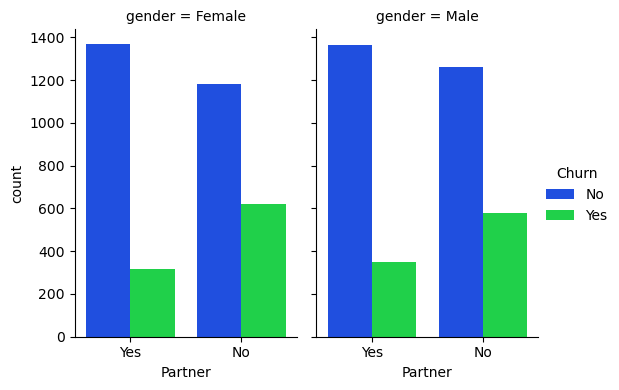

In [67]:
sns.catplot(x="Partner", hue="Churn", col="gender",data=df, kind="count",height=4, aspect=.7)

- Here we can say Male and female customers having no partner are more likely to churm.



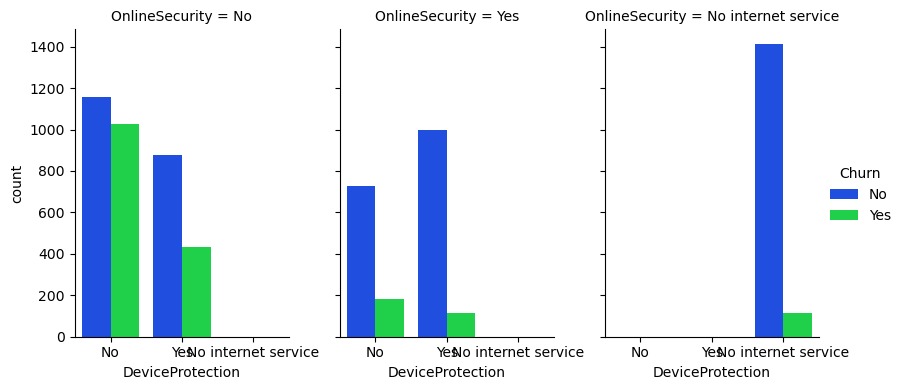

In [68]:
sns.catplot(x="DeviceProtection", hue="Churn", col="OnlineSecurity",data=df, kind="count",height=4, aspect=.7)

- Here we can see Customers not having Online security and device protection , are more likely to churn.



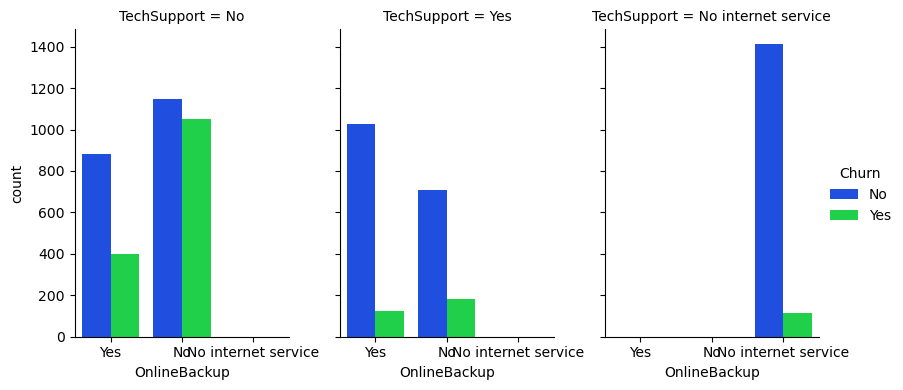

In [69]:
sns.catplot(x="OnlineBackup", hue="Churn", col="TechSupport", data=df, kind="count",height=4, aspect=.7)

- Here we can see customers with no online backup and without any technical support are more likly to churn.

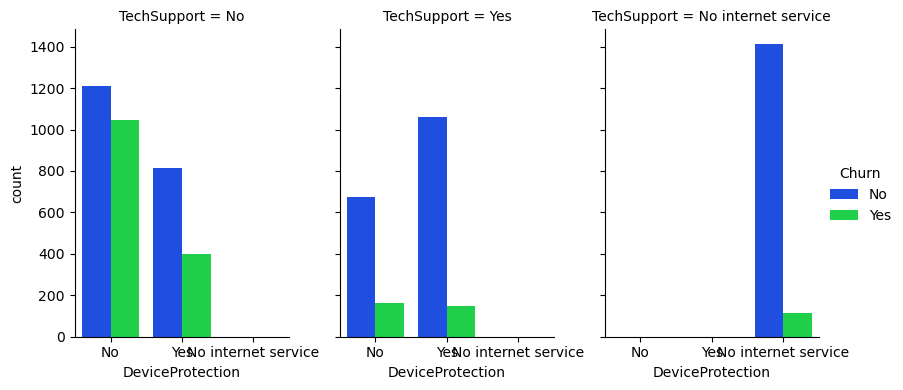

In [70]:
sns.catplot(x="DeviceProtection", hue="Churn", col="TechSupport", data=df, kind="count",height=4, aspect=.7)

- Customers without any device Protection and Techsupport are more likely to churn.
- Pepole with device protection and witout tech support are also more likely to churn.

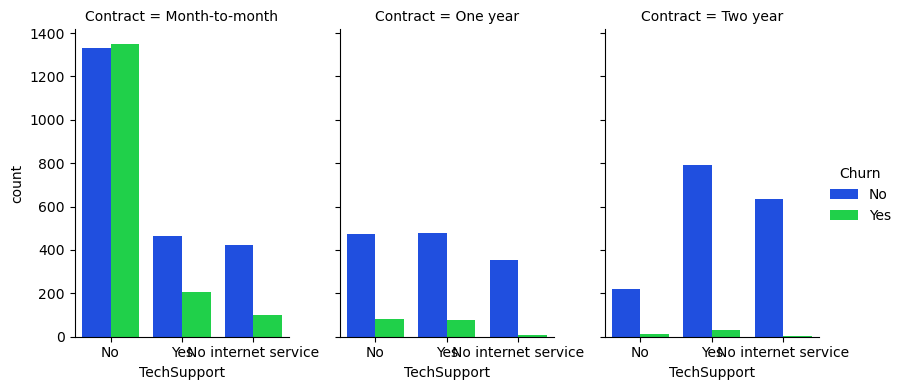

In [71]:
sns.catplot(x="TechSupport", hue="Churn", col="Contract", data=df, kind="count",height=4, aspect=.7)

- Here we can see customers with monthly contract and without any technical support are more likely to Churn.
- We can also say that for month to month contract, technical support is less.
- Due to less technical support Customers are more likely to churn.

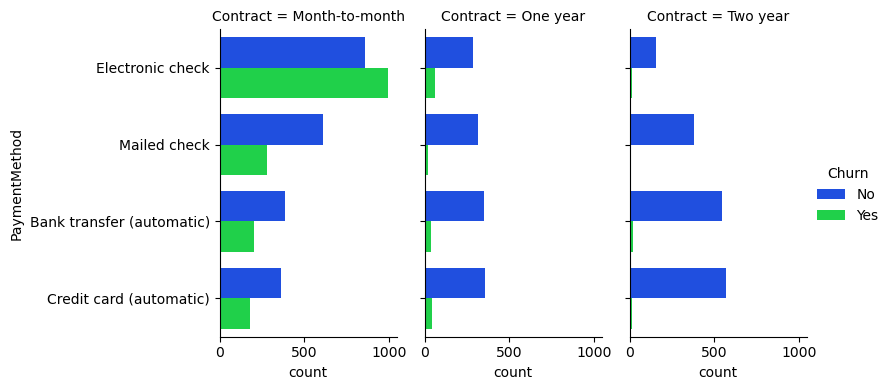

In [72]:
sns.catplot(y="PaymentMethod", hue="Churn", col="Contract", data=df, kind="count",height=4, aspect=.7)

- Customers with month to month contract and using Electronics check method for payment are more likely to Churn.



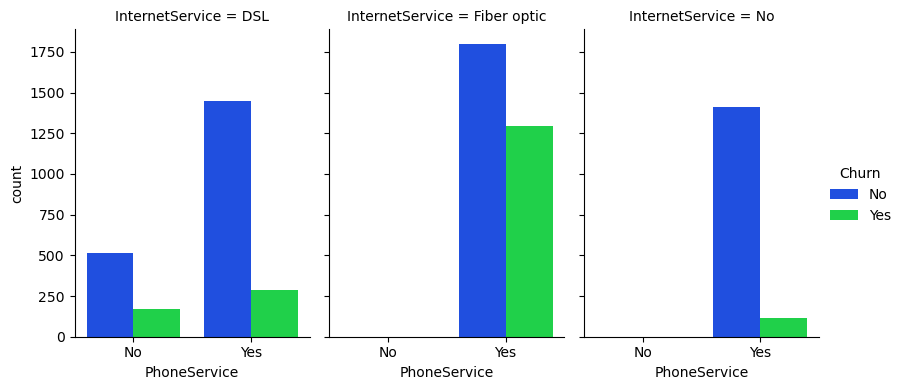

In [73]:
sns.catplot(x="PhoneService", hue="Churn", col="InternetService", data=df, kind="count",height=4, aspect=.7)

- Customers with Phone service and Internet as Fiber optics are more likely to churn.



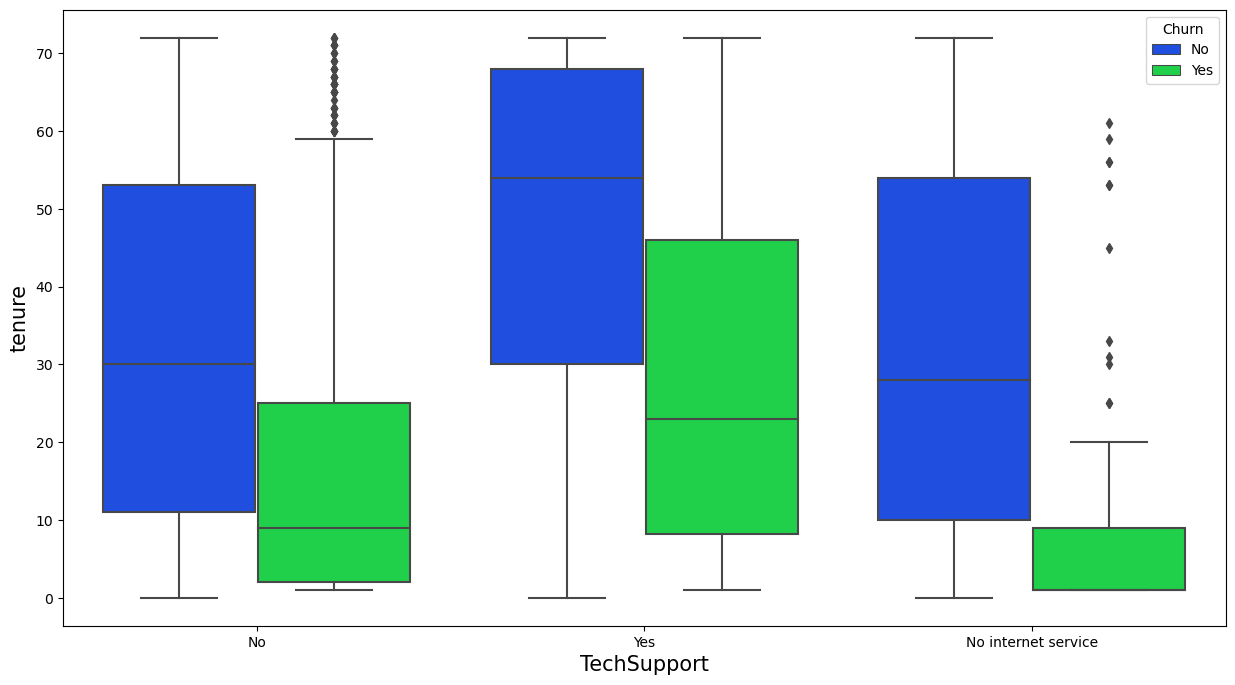

In [74]:
plt.figure(figsize=(15, 8))
sns.boxplot(y='tenure', x='TechSupport',hue='Churn' ,data= df)
plt.xlabel('TechSupport', fontsize=15)
plt.ylabel('tenure', fontsize=15)
plt.show()

- from Box plot we can see without any tech support the tennure is less and there is high chances of churn at less tenure.
- Customers opted for techsupport are more likely to stay with the company.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

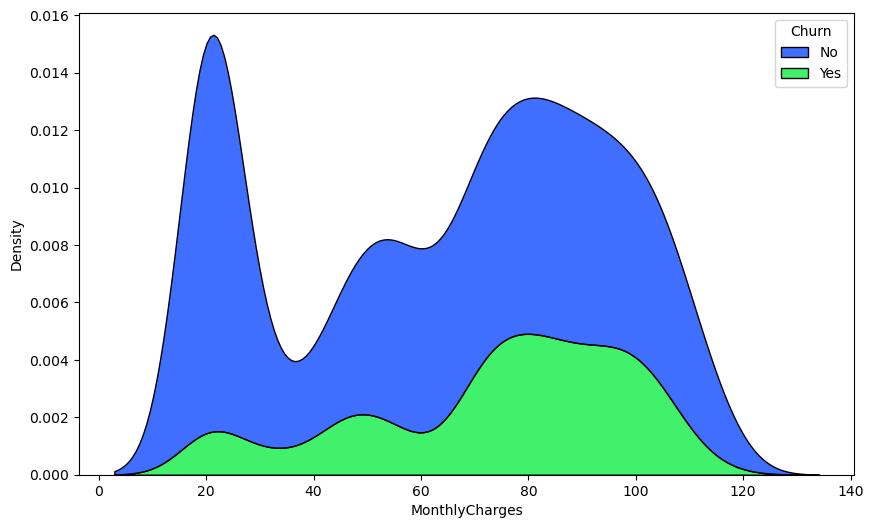

In [75]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = df, x="MonthlyCharges", hue="Churn", multiple="stack")

- We can see churn is high as the monthly charges increase.



<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

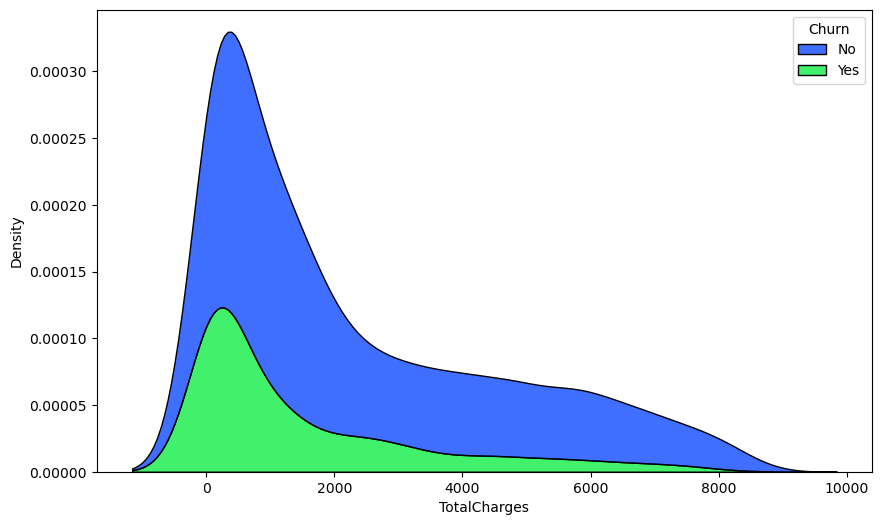

In [76]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = df, x="TotalCharges", hue="Churn", multiple="stack")

- Here we can see a reverse of monthly charges, as the Total charge increse the churning decreases.



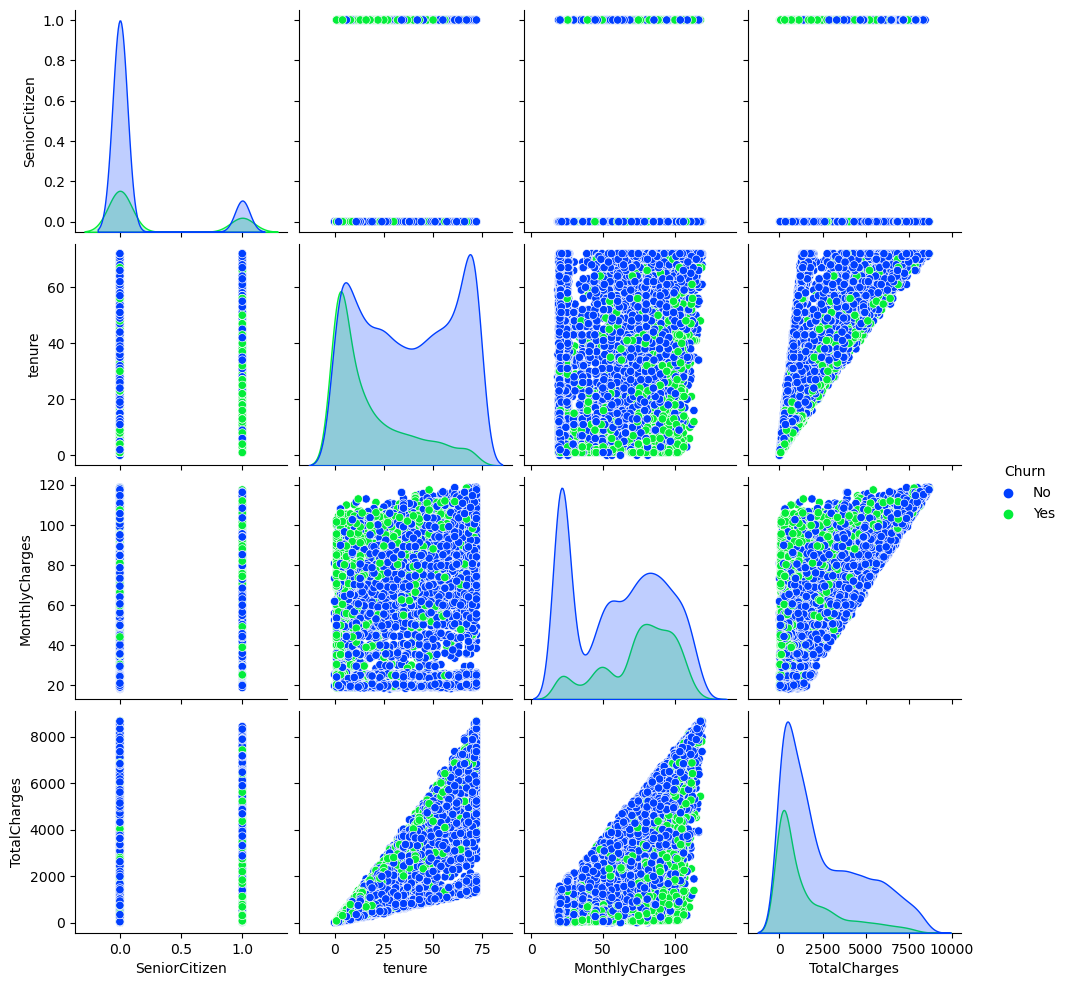

In [77]:
sns.pairplot(data=df, hue='Churn')

- From the pair plot we can predict Senior Citizen are more likely to churn



# Data Preprocessing

# Encoding the categorical object datatype columns


In [78]:
# Label Encoder

le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


- I have used LabelEncoder to convert the object data type in our label column "Churn" into a numerical format.



In [79]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encode(df, ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'SeniorCitizen',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0
1,5575-GNVDE,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0
2,3668-QPYBK,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1
3,7795-CFOCW,1.0,0.0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0
4,9237-HQITU,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1


- I have used OrdinalEncoder inside a function to loop through all the categorical data columns and covert those feature values from object data type to numerical data type values.



In [80]:
print(f"Shape of our data frame post encoding is", df.shape)
df.isnull().sum()

Shape of our data frame post encoding is (7043, 21)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- With the help of shape and isnull method I am taking a look at our data frame values post applying the encoding technique on them.



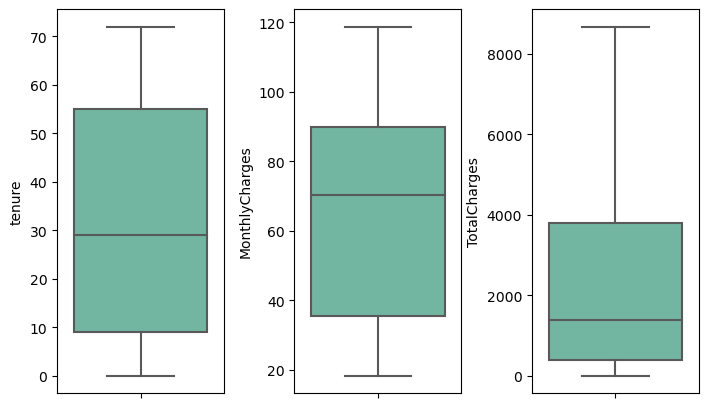

In [81]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(7,4))
index = 0
ax = ax.flatten()
for col, value in df[number_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set2")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

- With the usage of box plot we tried to check for outliers in our continous data columns and we found no outliers in them. Since we do not have to worry about any outliers in categorical column we won't have to fix any outlier concerns in our dataset.

# Checking Skewness


Here we will check skewness only for contineous data, not for categorical data.



In [82]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963235
Churn               1.063031
dtype: float64

- With the skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value. However most of those are categorical columns and we do not have to worry about outliers or skewness in catagorical data therefore we will ignore it. Having said that we will treat the skewness that is present in our continous data columns.

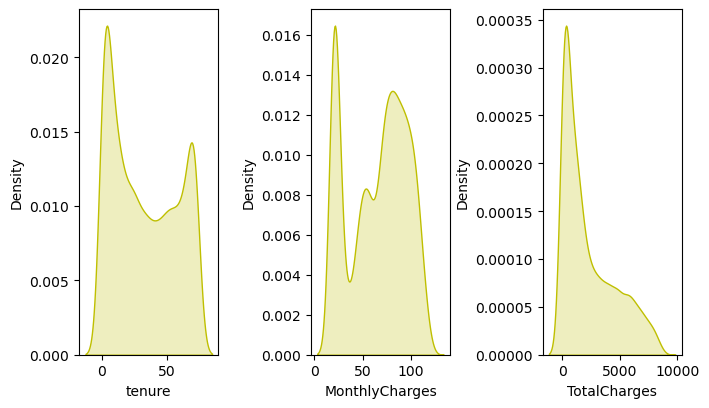

In [83]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(7,4))
index = 0
ax = ax.flatten()
for col, value in df[number_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

- In the above distribution plot we can see that our continous data columns have some skewness that will need to be treated and reduced to cover up an acceptable range in data values.

# Using Log Transform to fix skewness


In [84]:
for col in number_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

I have applied Log Transformation on our numerical datatype columns to ensure that we do not have skewness in our dataset.



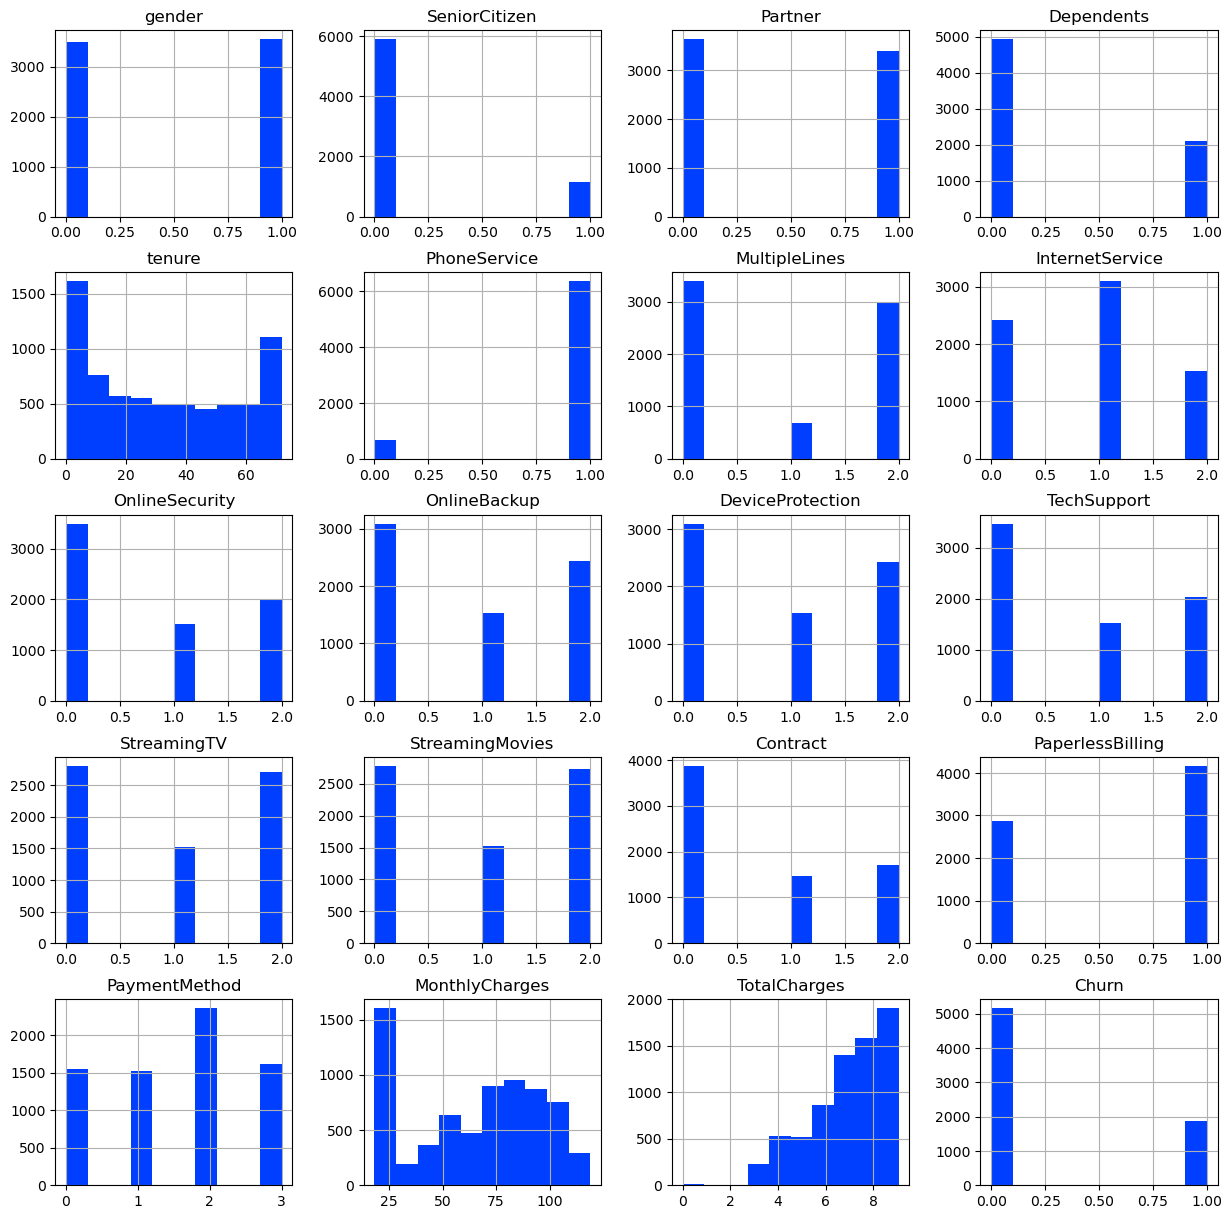

In [85]:
df.hist(figsize=(15,15))
plt.show()

- I have generated a histogram for all our dataset columns after applying enconding technique and converting all object datatype columns to numeric datatype values.



# Correlation using a Heatmap


- Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
- Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

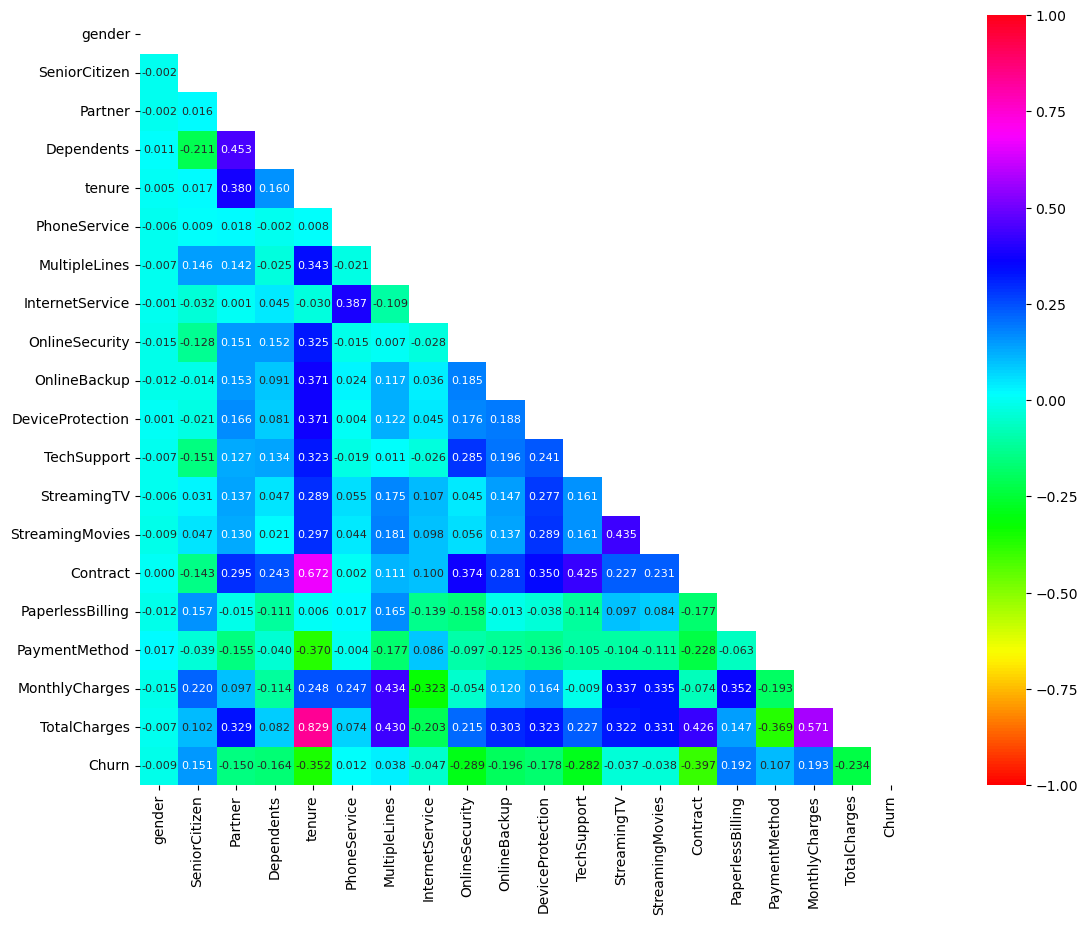

In [86]:
plt.style.use('seaborn-pastel')

upper_triangle = np.triu(df.corr())
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="hsv", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

- In the above heatmap we can see the correlation details plus we can determine that there is no multi colinearity issue between our columns.

# Correlation Bar Plot comparing features with our label


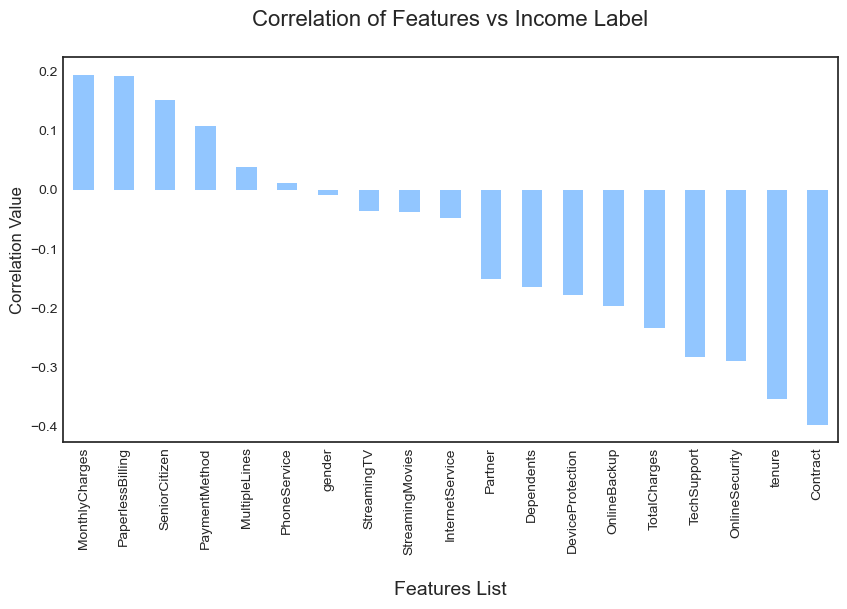

In [87]:
plt.style.use('seaborn-white')

df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['Churn'].sort_values(ascending=False).drop('Churn').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

- Since the heatmap was not able to give us a clearer picture on positive and negative correlation columns we have generated this bar plot and we see that columns monthly charges, paperless billing, senior citizen, payment method, multiple lines and phone service are positively correlated with our target label churn while all the remaining features are negatively correlated with our label column.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label


In [88]:
feature=df.drop('Churn', axis=1)
target= df['Churn']

In [89]:
df_new= pd.get_dummies(feature,sparse=False, drop_first=True )

In [90]:
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,customerID_9975-SKRNR,customerID_9978-HYCIN,customerID_9979-RGMZT,customerID_9985-MWVIX,customerID_9986-BONCE,customerID_9987-LUTYD,customerID_9992-RRAMN,customerID_9992-UJOEL,customerID_9993-LHIEB,customerID_9995-HOTOH
0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
df_new.shape

(7043, 7061)

In [92]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
Target = le.fit_transform(target)

In [93]:
df_new['Churn']= Target

# Scaling the data Using StandardScaler.


In [94]:
# Dividing into Feature and Target data
x=df_new.drop(['Churn'],axis=1)
y=df_new['Churn']

In [95]:
from sklearn.preprocessing import StandardScaler
SDC=StandardScaler()
x=SDC.fit_transform(x)

<AxesSubplot:xlabel='Churn', ylabel='count'>

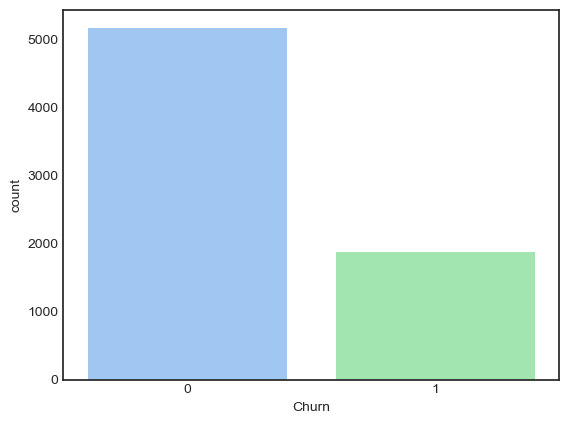

In [96]:
sns.countplot(y)

- Here we can see our output is not balanced we will now use SMOTE to balance the output.

from imblearn.over_sampling import SMOTE

In [97]:
from imblearn.over_sampling import SMOTE

In [98]:
X_train_over, Y_train_over =SMOTE(k_neighbors=3).fit_resample(x,y)

In [99]:
X_train_over.shape

(10348, 7061)

In [100]:
Y_train_over.shape

(10348,)

In [101]:
Y_train_over.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [102]:
df_new.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup',
       ...
       'customerID_9978-HYCIN', 'customerID_9979-RGMZT',
       'customerID_9985-MWVIX', 'customerID_9986-BONCE',
       'customerID_9987-LUTYD', 'customerID_9992-RRAMN',
       'customerID_9992-UJOEL', 'customerID_9993-LHIEB',
       'customerID_9995-HOTOH', 'Churn'],
      dtype='object', length=7062)

# Machine Learning Model for Classification with Evaluation Metrics


I have defined a function that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Chosing Best Random State


In [104]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=653,test_size=0.20)

In [105]:
lr= LogisticRegression()
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(accuracy_score(y_test_b,lr_pred))

0.7565649396735273


In [106]:
from sklearn.metrics import classification_report 
print(confusion_matrix(y_test_b, lr_pred))
print(classification_report(y_test_b, lr_pred))

[[1030    9]
 [ 334   36]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1039
           1       0.80      0.10      0.17       370

    accuracy                           0.76      1409
   macro avg       0.78      0.54      0.52      1409
weighted avg       0.77      0.76      0.68      1409



# Cross validation of model.


In [107]:
lr_pred=lr.predict(x_test_b)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test_b,lr_pred)
for j in range(2,10):
    lr_cv= cross_val_score(lr,x,y,cv=j)
    lr_cvscore=lr_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lr_cvscore*100)
    print("Accuracy Score:-", lr_score*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 73.81798283068684
Accuracy Score:- 75.65649396735273


at cv:- 3
Cross Validation scre is:- 75.15258644488463
Accuracy Score:- 75.65649396735273


at cv:- 4
Cross Validation scre is:- 75.60695595219659
Accuracy Score:- 75.65649396735273


at cv:- 5
Cross Validation scre is:- 75.80569714175108
Accuracy Score:- 75.65649396735273


at cv:- 6
Cross Validation scre is:- 76.06129877573822
Accuracy Score:- 75.65649396735273


at cv:- 7
Cross Validation scre is:- 76.28855890053353
Accuracy Score:- 75.65649396735273


at cv:- 8
Cross Validation scre is:- 76.35949269941182
Accuracy Score:- 75.65649396735273


at cv:- 9
Cross Validation scre is:- 76.37352347791246
Accuracy Score:- 75.65649396735273




At cv:9 Cross val score and Accuracy Score are having very less diffrence, Over model is perfoming well.



# Ensemble Techniques

# KNeighborsClassifier


In [108]:
kn=KNeighborsClassifier()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=7, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 76.72107877927608
Cross val Score : 76.54405528807577


In [109]:
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))

[[948  91]
 [237 133]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1039
           1       0.59      0.36      0.45       370

    accuracy                           0.77      1409
   macro avg       0.70      0.64      0.65      1409
weighted avg       0.75      0.77      0.75      1409



accuracy_score: 76.72107877927608

Cross val Score : 76.54405528807577

Both the score having no diffrence in score, model is performing well.
lets try another model

# DecisionTreeClassifier


In [110]:
dt=DecisionTreeClassifier()
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=7, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 77.50177430801988
Cross val score is: 77.16886367988691


In [111]:
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))

[[910 129]
 [188 182]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1039
           1       0.59      0.49      0.53       370

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409



accuracy_score 77.78566359119942

Cross val score is: 77.91326857975427

Both the score having no diffrence in score, model is not prforming well.
lets try another model

# RandomForestClassifier

In [112]:
rf=RandomForestClassifier()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=7, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  81.33427963094393
Cross val Score : 79.66784341475616


In [113]:
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))

[[967  72]
 [191 179]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1039
           1       0.71      0.48      0.58       370

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409




accuracy_score:  81.48261178140525
    
Cross val Score : 79.45459601590345
    
Model score is good, but diffrence in cv score and accuracy is high, but stil others are best model.

# AdaBoostClassifier


In [114]:
ad=AdaBoostClassifier()
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=7, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  81.76011355571327
Cross val Score : 80.09352030814124


In [115]:
print(confusion_matrix(y_test_b, ad_pred))
print(classification_report(y_test_b, ad_pred))

[[942  97]
 [160 210]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1039
           1       0.68      0.57      0.62       370

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



accuracy_score:  81.76011355571327
    
Cross val Score : 80.09352030814124

Both the score having less diffrence.



# GaussianNB


In [116]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score=accuracy_score(y_test_b, gb_pred)
print("Accuracy Score is:", gb_score*100)

gb_cv= cross_val_score(gb, x,y,cv=7, scoring='accuracy')
gb_cvscore=gb_cv.mean()
print("Cross Val Score is :", gb_cvscore*100)

Accuracy Score is: 26.259758694109298
Cross Val Score is : 26.536990286963135


In [117]:
print(confusion_matrix(y_test_b, gb_pred))
print(classification_report(y_test_b, gb_pred))

[[   0 1039]
 [   0  370]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1039
           1       0.26      1.00      0.42       370

    accuracy                           0.26      1409
   macro avg       0.13      0.50      0.21      1409
weighted avg       0.07      0.26      0.11      1409



Accuracy Score is: 26.259758694109298
    
Cross Val Score is : 26.536990286963135


Both score having good Accuracy. Model has perfomed well.


- GaussianNBKNeighborsClassifier and AdaBoostClassifier are having good accurcay and performance.

In [133]:
filename = "FinalModel_E08.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_E08.pkl']

Finally I am saving my best classification model using the joblib library.



# THANKYOU